# TP5 - VpC1
### Andrés Merli

- Implementar el detector de fondo naive usando la mediana como
estimador. El algoritmo debe recibir el parámetro N (cantidad de
frames utilizados para la estimación) y el intervalo de tiempo para
recalcular el fondo.
- Se deben generar las mascaras de foreground y aplicarlas a los frames
para segmentar los objetos en movimiento.
- Comparar con alguno de los métodos vistos en la practica basados en
mezcla de gaussianas

In [2]:
#%matplotlib inline  

import numpy as np
import cv2 as cv
import random
import matplotlib.pyplot as plt

In [3]:
#filename = 'vtest.avi'
filename = 'slow_traffic_small.mp4'
capture = cv.VideoCapture(filename)

In [4]:
# verificamos función para obtener cantidad de frames
capture.get(cv.CAP_PROP_FRAME_COUNT)

914.0

#### Código que calcula el background a partir de la mediana de una grupo N aleatorio de frames

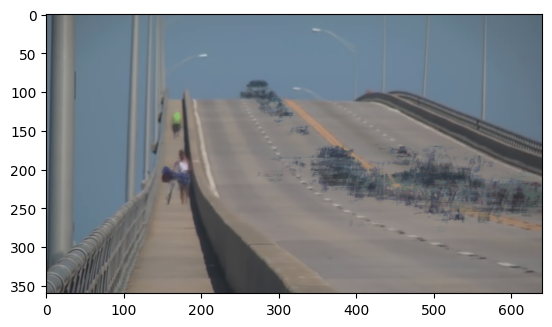

-1

In [9]:
#filename = 'vtest.avi'
filename = 'slow_traffic_small.mp4'
capture = cv.VideoCapture(filename)

n_frames = 30
frames_list = []

if not capture.isOpened:
    print('Falla al abrir el archivo: ' + filename)
    exit(0)

# Seleccionamos n_frames de forma aleatoria

random_list = random.sample(range(int(capture.get(cv.CAP_PROP_FRAME_COUNT))), n_frames)
#frameIds = capture.get(cv.CAP_PROP_FRAME_COUNT) * np.random.uniform(size=50)

# Store selected frames in an array

for n in random_list:
    capture.set(cv.CAP_PROP_POS_FRAMES, n)
    ret, frame = capture.read()
    frames_list.append(frame)
frames_array = np.array(frames_list)

# Calculamos la mediana del grupo de n_frames
background_model = np.median(frames_array, axis=0).astype(dtype=np.uint8) 

# Mostramos simplemente el modelo de fondo creado por pantalla y en la notebook

plt.imshow(cv.cvtColor(background_model, cv.COLOR_BGR2RGB))
plt.show()

cv.imshow('frame', background_model)
cv.waitKey()



#### Generamos las máscaras y aplicamos a los frames en movimiento

In [ ]:
# Corremos la sustraccion
#------------------------
while True:
    # Leemos un frame
    ret, frame = capture.read()
    if frame is None:
        break
    
    # Aplicamos la sustracción al frame leído
    #----------------------------------------
    foreground = frame - background_model
    ret, fgMask = cv.threshold(foreground,120,255,cv.THRESH_BINARY)
    
    
    # Escribimos sobre la imagen el número de frame procesado
    cv.rectangle(frame, (10, 2), (100,20), (255,255,255), -1)
    cv.putText(frame, str(capture.get(cv.CAP_PROP_POS_FRAMES)), (15, 15),
               cv.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0))
    
    # mostramos frame original e imagen binaria background/foreground
    cv.imshow('Frame', frame)
    cv.imshow('FG Mask', fgMask)
    
    # Corresmos hasta que termine o apriete escape
    keyboard = cv.waitKey(30)
    if keyboard == 'q' or keyboard == 27:
        break

cv.destroyAllWindows()
capture.release()



# Reset frame number to 0
capture.set(cv.CAP_PROP_POS_FRAMES, 0)

# Convert background to grayscale
grayMedianFrame = cv.cvtColor(medianFrame, cv.COLOR_BGR2GRAY)

# Loop over all frames
ret = True
while(ret):

# Read frame
    ret, frame = capture.read()
    # Convert current frame to grayscale
    frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Calculate absolute difference of current frame and 
    # the median frame
    dframe = cv.absdiff(frame, grayMedianFrame)
    # Treshold to binarize
    th, dframe = cv.threshold(dframe, 30, 255, cv.THRESH_BINARY)
    # Display image
    cv.imshow('frame', dframe)
    cv.waitKey()

# Release video object
capture.release()

# Destroy all windows
cv.destroyAllWindows()

In [163]:
# Abrimos el archivo
#-------------------
#filename = 'vtest.avi'
filename = 'slow_traffic_small.mp4'
capture = cv.VideoCapture(filename)
n_frames = 10
frames_list = []

if not capture.isOpened:
    print('Falla al abrir el archivo: ' + filename)
    exit(0)

random_list = random.sample(range(int(capture.get(cv.CAP_PROP_FRAME_COUNT))), n_frames)


for n in random_list:
    capture.set(n,2)
    ret, frame = capture.read()
    frames_list.append(frame)
frames_array = np.array(frames_list)

background_model = np.median(frames_array, axis=0).astype(np.uint8)
cv.imshow('Frame', background_model)
cv.waitKey()

# Corremos la sustraccion
#------------------------
while True:
    # Leemos un frame
    ret, frame = capture.read()
    if frame is None:
        break
    
    # Aplicamos la sustracción al frame leído
    #----------------------------------------
    foreground = frame - background_model
    ret, fgMask = cv.threshold(foreground,120,255,cv.THRESH_BINARY)
    
    
    # Escribimos sobre la imagen el número de frame procesado
    cv.rectangle(frame, (10, 2), (100,20), (255,255,255), -1)
    cv.putText(frame, str(capture.get(cv.CAP_PROP_POS_FRAMES)), (15, 15),
               cv.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0))
    
    # mostramos frame original e imagen binaria background/foreground
    cv.imshow('Frame', frame)
    cv.imshow('FG Mask', fgMask)
    
    # Corresmos hasta que termine o apriete escape
    keyboard = cv.waitKey(30)
    if keyboard == 'q' or keyboard == 27:
        break

cv.destroyAllWindows()
capture.release()



# Reset frame number to 0
capture.set(cv.CAP_PROP_POS_FRAMES, 0)

# Convert background to grayscale
grayMedianFrame = cv.cvtColor(medianFrame, cv.COLOR_BGR2GRAY)

# Loop over all frames
ret = True
while(ret):

# Read frame
    ret, frame = capture.read()
    # Convert current frame to grayscale
    frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Calculate absolute difference of current frame and 
    # the median frame
    dframe = cv.absdiff(frame, grayMedianFrame)
    # Treshold to binarize
    th, dframe = cv.threshold(dframe, 30, 255, cv.THRESH_BINARY)
    # Display image
    cv.imshow('frame', dframe)
    cv.waitKey()

# Release video object
capture.release()

# Destroy all windows
cv.destroyAllWindows()




In [5]:
# Randomly select 25 frames
frameIds = capture.get(cv.CAP_PROP_FRAME_COUNT) * np.random.uniform(size=50)

# Store selected frames in an array
frames = []
for fid in frameIds:
    capture.set(cv.CAP_PROP_POS_FRAMES, fid)
    ret, frame = capture.read()
    frames.append(frame)

# Calculate the median along the time axis
medianFrame = np.median(frames, axis=0).astype(dtype=np.uint8)    

# Display median frame
cv.imshow('frame', medianFrame)
cv.waitKey(0)

-1

In [6]:
# Reset frame number to 0
capture.set(cv.CAP_PROP_POS_FRAMES, 0)

# Convert background to grayscale
grayMedianFrame = cv.cvtColor(medianFrame, cv.COLOR_BGR2GRAY)

# Loop over all frames
ret = True
while(ret):

# Read frame
    ret, frame = capture.read()
    # Convert current frame to grayscale
    frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Calculate absolute difference of current frame and 
    # the median frame
    dframe = cv.absdiff(frame, grayMedianFrame)
    # Treshold to binarize
    th, dframe = cv.threshold(dframe, 30, 255, cv.THRESH_BINARY)
    # Display image
    cv.imshow('frame', dframe)
    cv.waitKey()

# Release video object
capture.release()

# Destroy all windows
cv.destroyAllWindows()



error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


: 